In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(10000, centers=4, random_state=42)

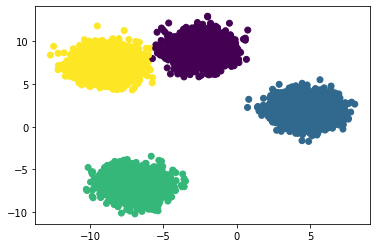

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).todense()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [7]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation="sigmoid", name="l1"))
model.add(Dense(4, activation="softmax", name="l2"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 5)                 15        
_________________________________________________________________
l2 (Dense)                   (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adadelta",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [22]:
outcome = model.fit(X_train, y_train, epochs=10)

Train on 6700 samples
Epoch 1/10
6700/6700 [==============================] - 0s 73us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 2/10
6700/6700 [==============================] - 0s 44us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 3/10
6700/6700 [==============================] - 0s 46us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 4/10
6700/6700 [==============================] - 0s 43us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 5/10
6700/6700 [==============================] - 0s 42us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 6/10
6700/6700 [==============================] - 0s 43us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 7/10
6700/6700 [==============================] - 0s 60us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 8/10
6700/6700 [==============================] - 0s 46us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 9/10
6700/6700 [==============================] - 0s 44us/sample - loss: 0.0017 - accuracy: 0.9997
Epoch 10/10
6700/6700 [==========

In [11]:
model.evaluate(X_test, y_test, verbose=0)

[0.10260862254735195, 0.9987879]

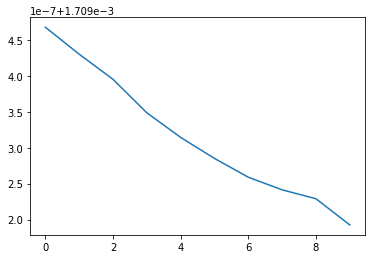

In [23]:
plt.plot(outcome.history["loss"])

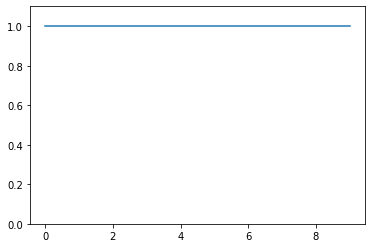

In [24]:
plt.figure()
plt.plot(outcome.history["accuracy"])
plt.ylim(0, 1.1)
plt.show()

In [25]:
X_test[0].shape

(2,)